# COVID 19 analysis

## Intro

How to install the required tools to run this?
Well, you should follow the intructions.

It would not have been possible to run this if you didn't have the notebook, but again, the instructions are in the README.md.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [3]:
# set the seed
np.random.seed(1)

In [4]:
import plotly.express as px
import plotly.graph_objects as go

In [5]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]
plt.rcParams['figure.dpi'] = 80

import seaborn as sns

#sns.set_context("paper")
sns.set_context("notebook")
plt.style.use('seaborn-darkgrid')

In [7]:
#COVID-19/archived_data/archived_time_series
confirmed_df = pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [8]:
# Melt data with dates into rows
confirmed_data_df = confirmed_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="Date", value_name="Confirmed")
death_data_df = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="Date", value_name="Deaths")
recovered_data_df = recovered_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="Date",  value_name="Recovered")

In [9]:
confirmed_data_df

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.00000,65.000000,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0
...,...,...,...,...,...,...
20509,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,4/8/20,5
20510,Saint Pierre and Miquelon,France,46.88520,-56.315900,4/8/20,1
20511,NaN,South Sudan,6.87700,31.307000,4/8/20,2
20512,NaN,Western Sahara,24.21550,-12.885800,4/8/20,4


In [10]:
confirmed_data_df[confirmed_data_df["Confirmed"].isna()]

,Province/State,Country/Region,Lat,Long,Date,Confirmed


In [11]:
death_data_df[death_data_df['Deaths'].isna()]

,Province/State,Country/Region,Lat,Long,Date,Deaths


In [12]:
recovered_data_df[recovered_data_df['Recovered'].isna()]

,Province/State,Country/Region,Lat,Long,Date,Recovered


In [13]:
all_data_df = pd.concat([confirmed_data_df, death_data_df['Deaths'] , recovered_data_df['Recovered']], axis=1).reset_index().drop(['index'], axis=1)

In [14]:
# Add zero where we have no data
all_data_df[["Deaths", "Recovered", "Confirmed"]] = all_data_df[["Deaths", "Recovered", "Confirmed"]].apply(lambda row: row.fillna(0))

In [15]:
# Changing Date column into an actual date type
all_data_df.loc[:, "Date"] = all_data_df["Date"].apply(lambda s: pd.to_datetime(s).date())

In [16]:
latest_date = all_data_df["Date"].max()

In [17]:
confirmed_data_df.dropna(subset=["Province/State"])

,Province/State,Country/Region,Lat,Long,Date,Confirmed
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0
10,Northern Territory,Australia,-12.4634,130.8456,1/22/20,0
11,Queensland,Australia,-28.0167,153.4000,1/22/20,0
12,South Australia,Australia,-34.9285,138.6007,1/22/20,0
...,...,...,...,...,...,...
20501,British Virgin Islands,United Kingdom,18.4207,-64.6400,4/8/20,3
20502,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,4/8/20,8
20507,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,4/8/20,2
20509,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/8/20,5


In [18]:
confirmed_df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [19]:
us_data_df = all_data_df[(all_data_df["Confirmed"] > 30) & (all_data_df["Country/Region"] == "US")].sort_values('Confirmed')

In [20]:
world_data_df = all_data_df[(all_data_df["Confirmed"] > 1000)].groupby("Country/Region").max().reset_index().sort_values('Confirmed')

In [21]:
@interact
def show_confirmed_more_than(confirmed=(400, 100000, 100)):
    return all_data_df[(all_data_df["Confirmed"] > confirmed)].groupby("Country/Region").max().reset_index().sort_values('Confirmed')


interactive(children=(IntSlider(value=50200, description='confirmed', max=100000, min=400, step=100), Output()…

In [22]:
world_data_df = world_data_df.sort_values('Recovered')

In [23]:
world_data_df

,Country/Region,Province/State,Lat,Long,Date,Confirmed,Deaths,Recovered
4,Belarus,NaN,53.7098,27.9534,2020-04-08,1066,13,0.0
52,Slovenia,NaN,46.1512,14.9955,2020-04-08,1091,40,0.0
35,Moldova,NaN,47.4116,28.3699,2020-04-08,1174,27,0.0
26,Iraq,NaN,33.0000,44.0000,2020-04-08,1202,69,0.0
38,New Zealand,NaN,-40.9006,174.8860,2020-04-08,1210,1,0.0
...,...,...,...,...,...,...,...,...
3,Austria,NaN,47.5162,14.5501,2020-04-08,12942,273,58946.0
62,United Kingdom,NaN,55.3781,-3.4360,2020-04-08,60733,7097,60811.0
33,Malaysia,NaN,2.5000,112.5000,2020-04-08,4119,65,62889.0
30,Japan,NaN,36.0000,138.0000,2020-04-08,4257,93,63153.0


In [24]:
eu_countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"]

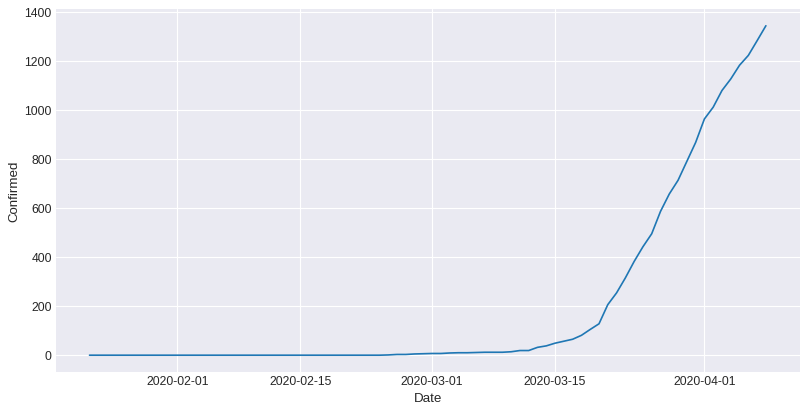

In [25]:
grid = sns.lineplot(data=all_data_df[(all_data_df["Country/Region"] == 'Croatia')], x="Date", y="Confirmed")

In [26]:
# Slovenia and Hungary are bordering Croatia in north, Bosnia and Herzegovina, and Serbia in east, it has a short border with Montenegro, and it shares maritime borders with Italy.
croatia_bordering_countried = ['Croatia', 'Slovenia', 'Hungary', 'Serbia', 'Montenegro', 'Italy', 'Bosnia and Herzegovina']
croatia_bordering_countried_no_it = ['Croatia', 'Slovenia', 'Hungary', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina']

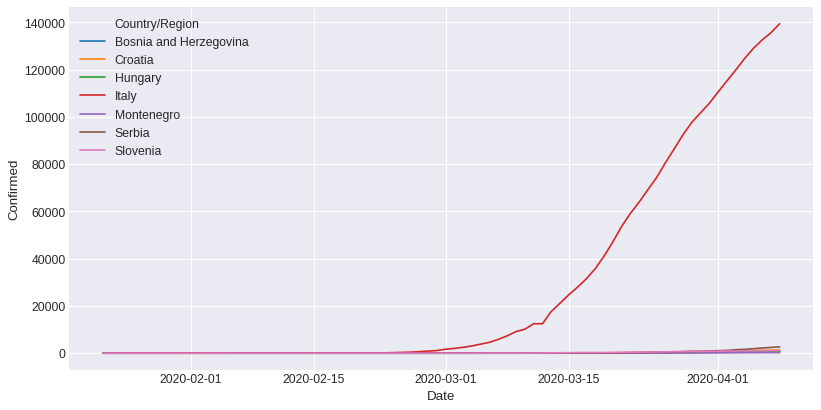

In [27]:
grid = sns.lineplot(data=all_data_df[(all_data_df["Country/Region"].isin(croatia_bordering_countried))], x="Date", y="Confirmed", hue="Country/Region")

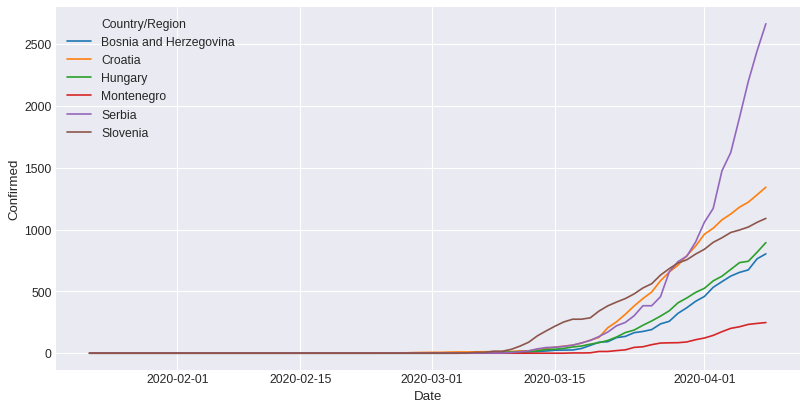

In [28]:
grid = sns.lineplot(data=all_data_df[(all_data_df["Country/Region"].isin(croatia_bordering_countried_no_it))], x="Date", y="Confirmed", hue="Country/Region")

In [29]:
import datetime

all_data_df['DateWeek'] = all_data_df['Date'].apply(lambda date_row: date_row.isocalendar()[1])
all_data_df['DayOfYear'] = all_data_df['Date'].apply(lambda date_row: date_row.timetuple().tm_yday)

[(30, 77.5)]

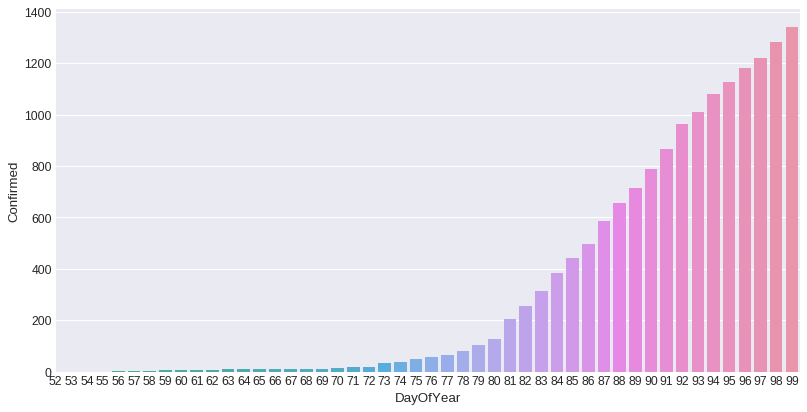

In [30]:
g = sns.barplot(data=(all_data_df[(all_data_df["Country/Region"] == 'Croatia')].groupby(['DayOfYear']).max()).reset_index(), x="DayOfYear", y="Confirmed")
g.set(ylim=(0, None))
g.set(xlim=(30, None))

[(30, 77.5)]

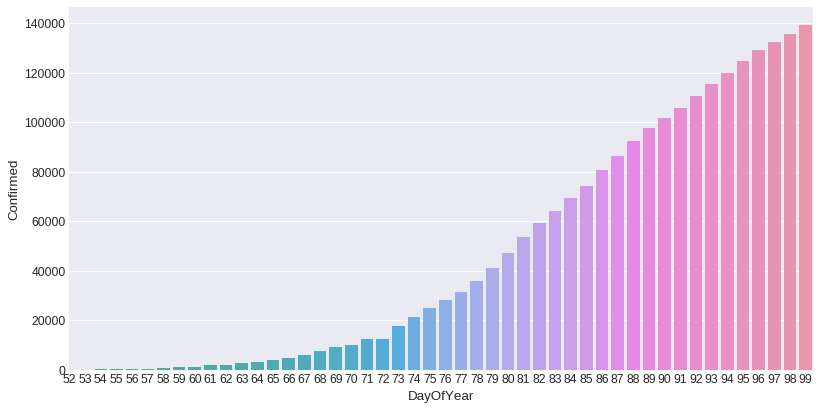

In [31]:
g = sns.barplot(data=(all_data_df[(all_data_df["Country/Region"] == 'Italy')].groupby(['DayOfYear']).max()).reset_index(), x="DayOfYear", y="Confirmed")
g.set(ylim=(0, None))
g.set(xlim=(30, None))

## Logistic curve

In [32]:
import numpy, scipy
from scipy.optimize import curve_fit
import warnings

np.set_printoptions(suppress=True)

In [33]:
def show_logistic_regression(x_data, y_data, title='Data projection', initial_params=np.array([1.0, 1.0, 1.0])):

    def logistic_equation(x, a, b, c):
        return a / (1.0 + np.power(x / b, c))

    fitted_parameters, pcov = curve_fit(logistic_equation, x_data, y_data, initial_params, maxfev=10000)

    model_predictions = logistic_equation(x_data, *fitted_parameters) 

    absolute_error = model_predictions - y_data

    squared_error = np.square(absolute_error)
    mean_squared_error = np.mean(squared_error)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    r_squared = 1.0 - (np.var(absolute_error) / np.var(y_data))

    print('Parameters:', fitted_parameters)
    print('RMSE:', root_mean_squared_error)
    print('R-squared:', r_squared)

    print()


    def scatter_plot():
        f = plt.figure(figsize=(16,10), dpi=100)
        axes = f.add_subplot(111)

        # Plot the actual data
        axes.plot(x_data, y_data, 'X')

        # Create model data
        x_model = numpy.linspace(min(x_data), max(x_data) + 40)
        y_model = logistic_equation(x_model, *fitted_parameters)

        # Plot model data
        axes.plot(x_model, y_model)

        axes.set_xlabel('Days in year')
        axes.set_ylabel('Confirmed cases')

        axes.set_title(title)

        axes.axvline(datetime.date.today().timetuple().tm_yday, 0, 1, color='red', linewidth=4)
        axes.axhline(fitted_parameters[0], 0, 1, color='blue', linewidth=4)


    scatter_plot()

## Europe

## Italy

Text(0.5, 1.0, 'Italy confirmed cases')

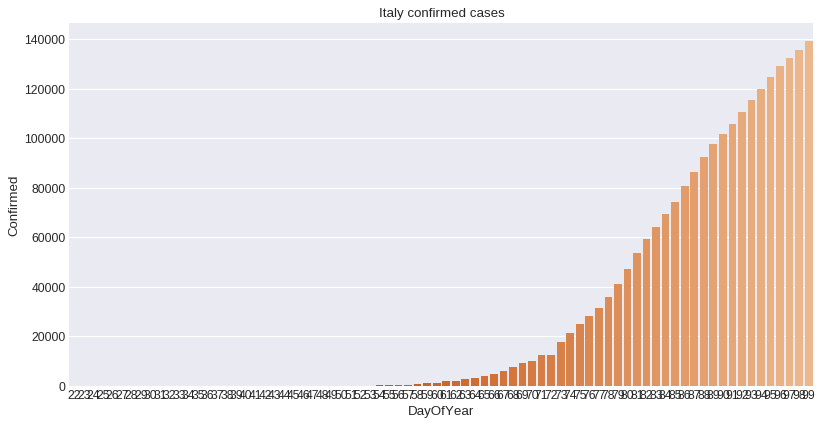

In [34]:
italy_df = all_data_df[(all_data_df["Country/Region"] == 'Italy')]

ax = sns.barplot(data=italy_df, x="DayOfYear", y="Confirmed", ci="sd", palette="Oranges_d")
ax.set_title('Italy confirmed cases')

Parameters: [159804.85427161     85.90423098    -12.69304885]
RMSE: 796.4294584583555
R-squared: 0.9996736720694749



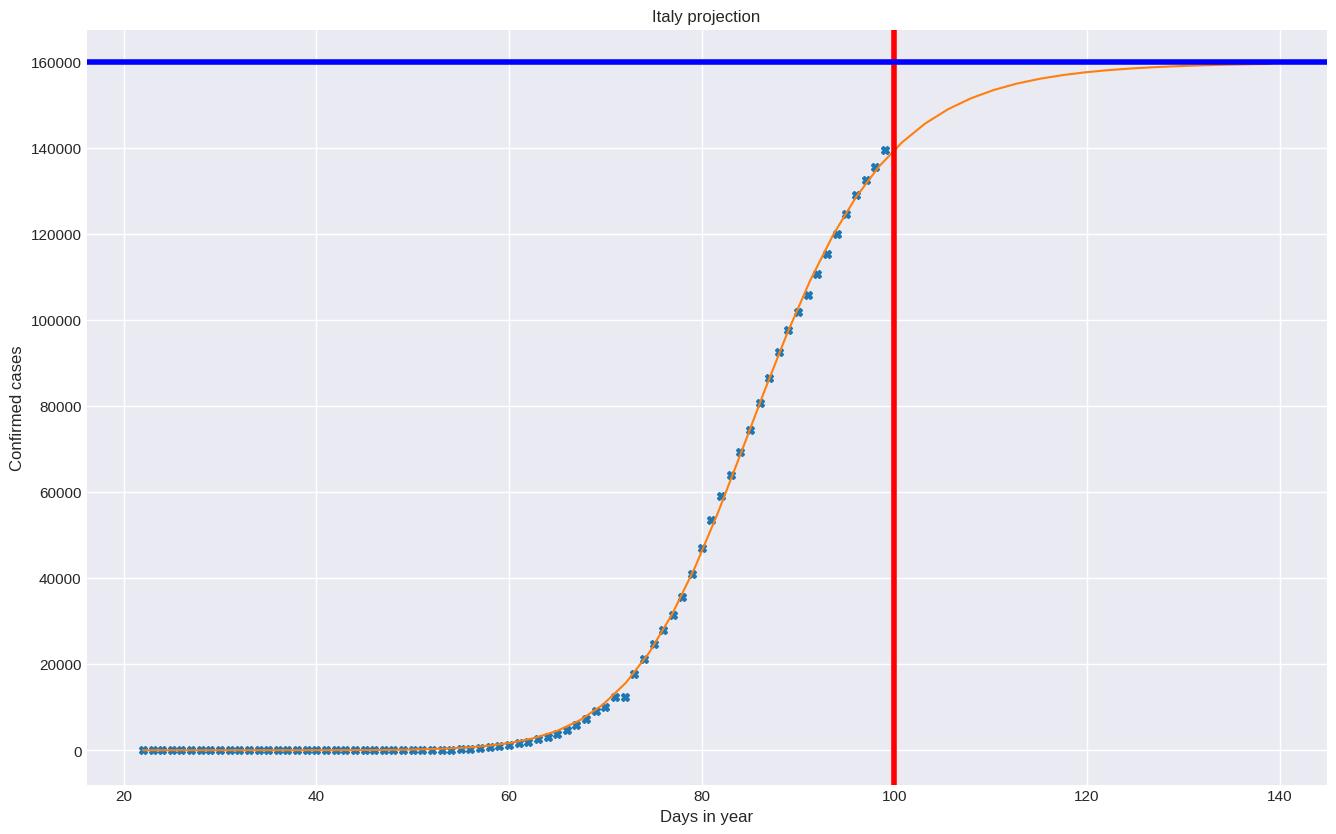

In [35]:
fit_data_df = italy_df

x_data = fit_data_df['DayOfYear'].values
y_data = fit_data_df['Confirmed'].values

show_logistic_regression(x_data, y_data, title='Italy projection')

## Spain

Text(0.5, 1.0, 'Spain confirmed cases')

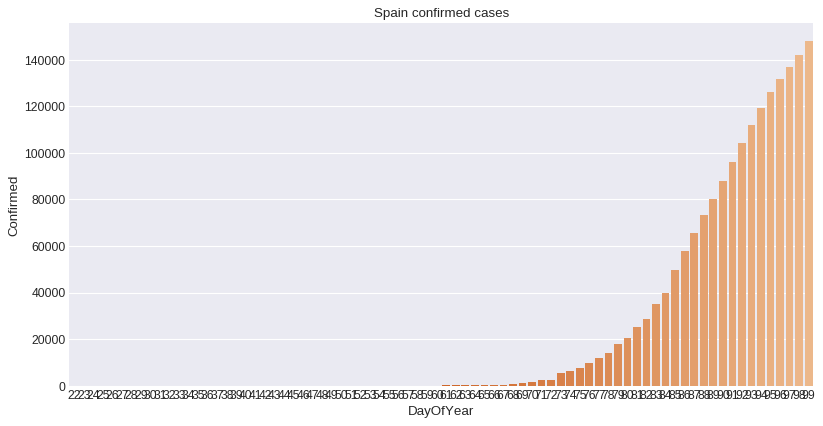

In [36]:
spain_df = all_data_df[(all_data_df["Country/Region"] == 'Spain')]

ax = sns.barplot(data=spain_df, x="DayOfYear", y="Confirmed", ci="sd", palette="Oranges_d")
ax.set_title('Spain confirmed cases')

/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in power



Parameters: [173864.59885205     89.79917746    -17.20494185]
RMSE: 597.3660249918701
R-squared: 0.9997988391067323



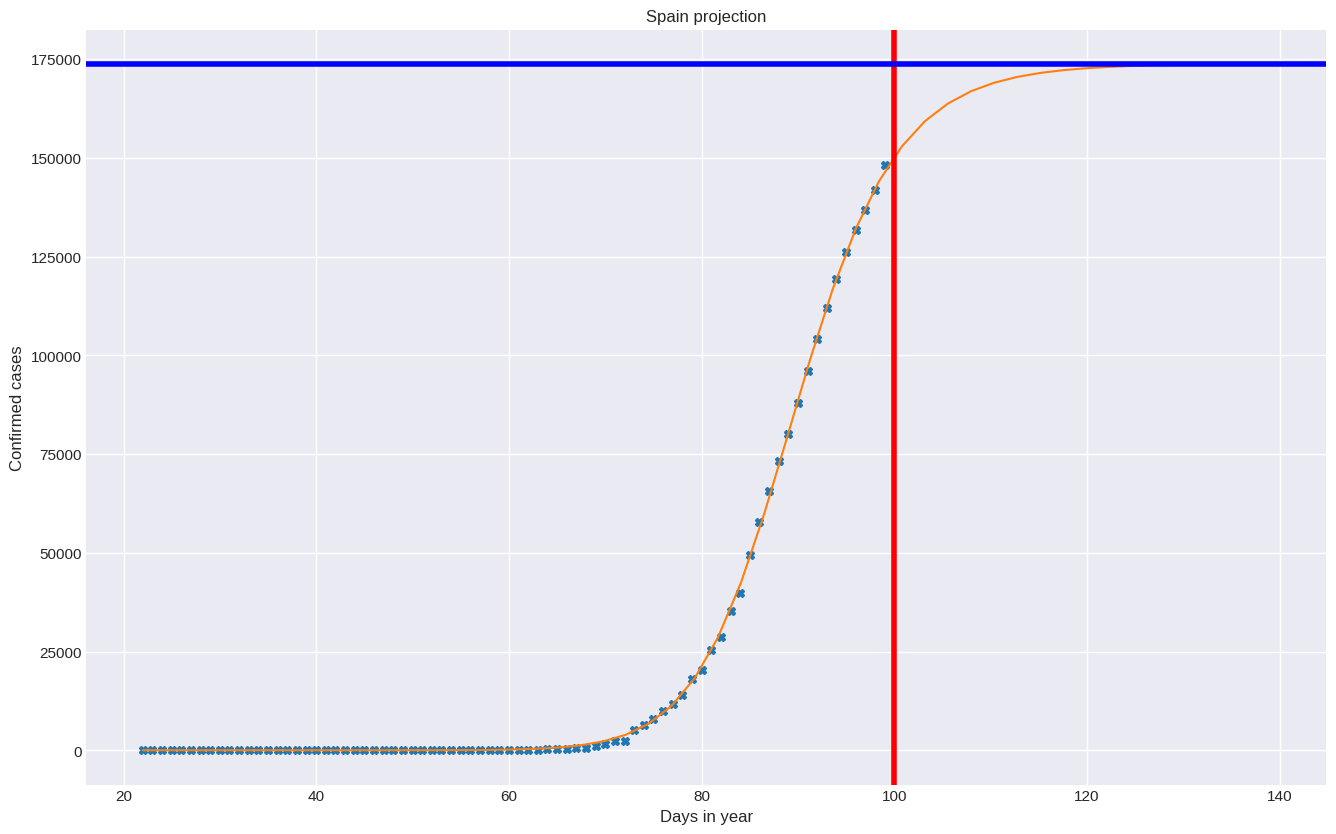

In [37]:
fit_data_df = spain_df

x_data = fit_data_df['DayOfYear'].values
y_data = fit_data_df['Confirmed'].values

show_logistic_regression(x_data, y_data, title='Spain projection', initial_params=np.array([120000, 30.0, 1.0]))

## Germany

Text(0.5, 1.0, 'Germany confirmed cases')

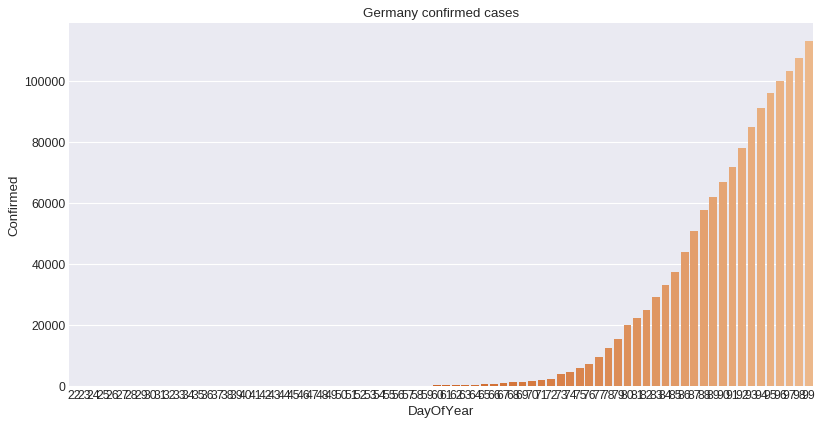

In [38]:
germany_df = all_data_df[(all_data_df["Country/Region"] == 'Germany')]

ax = sns.barplot(data=germany_df, x="DayOfYear", y="Confirmed", ci="sd", palette="Oranges_d")
ax.set_title('Germany confirmed cases')

/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in power



Parameters: [135973.424621       90.059053      -16.07657007]
RMSE: 687.8624325268652
R-squared: 0.9995407919907672



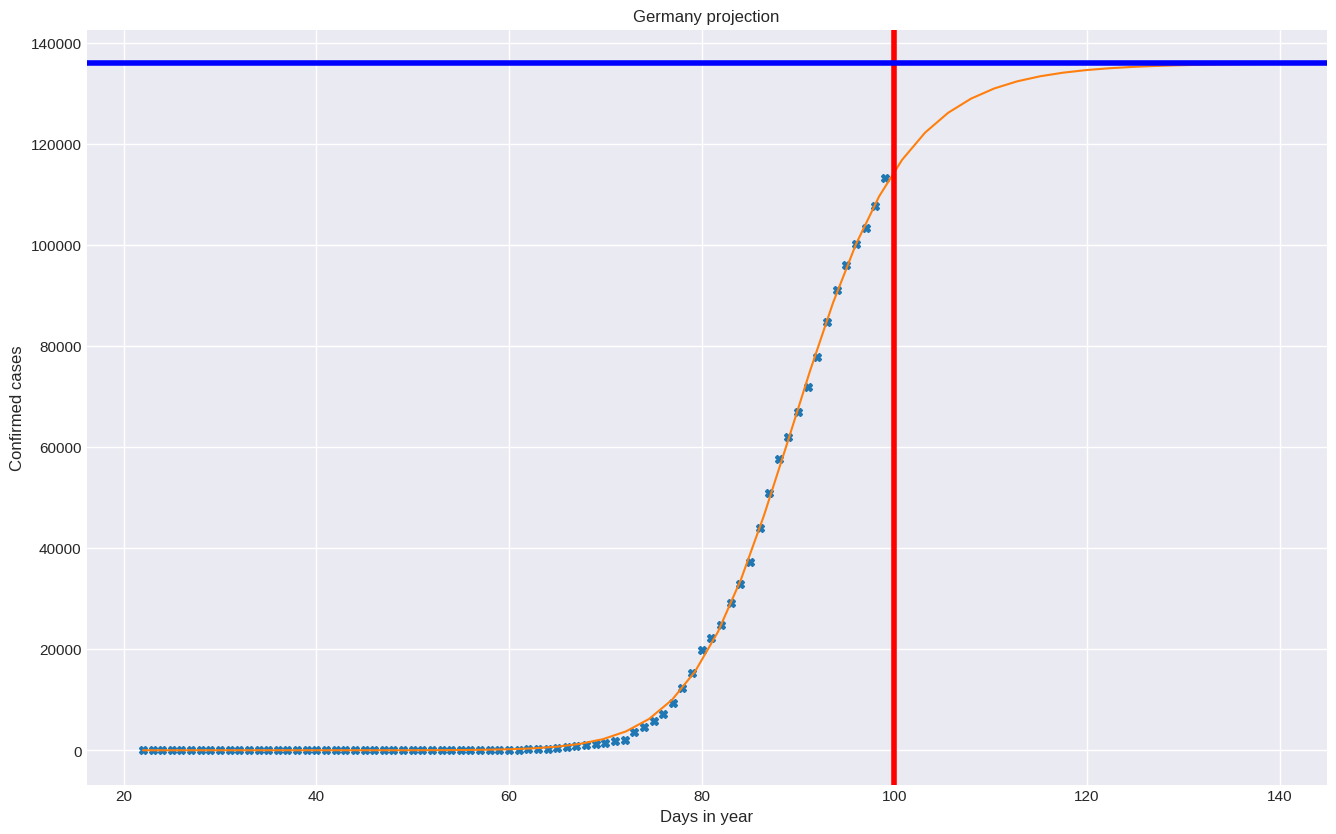

In [39]:
fit_data_df = germany_df

x_data = fit_data_df['DayOfYear'].values
y_data = fit_data_df['Confirmed'].values

show_logistic_regression(x_data, y_data, title='Germany projection', initial_params=np.array([10000, 1.0, 1.0]))

## Croatia

Text(0.5, 1.0, 'Croatia confirmed cases')

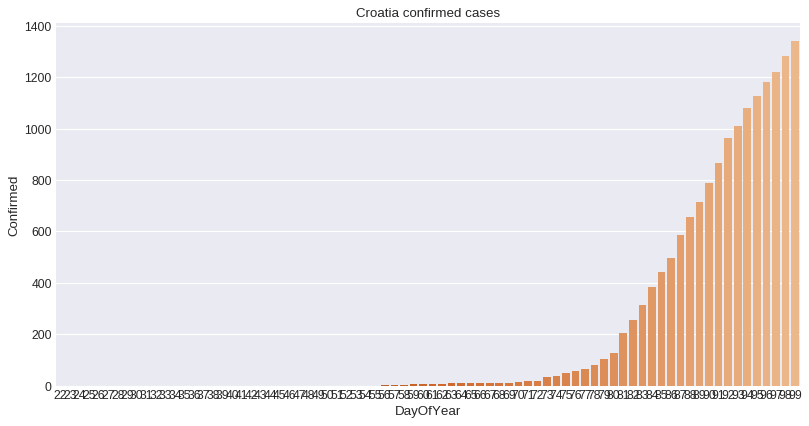

In [40]:
croatia_df = all_data_df[(all_data_df["Country/Region"] == 'Croatia')]

ax = sns.barplot(data=croatia_df, x="DayOfYear", y="Confirmed", ci="sd", palette="Oranges_d")
ax.set_title('Croatia confirmed cases')

Parameters: [1492.5641428    89.28312687  -18.99428647]
RMSE: 10.206152468331101
R-squared: 0.9992671808838909



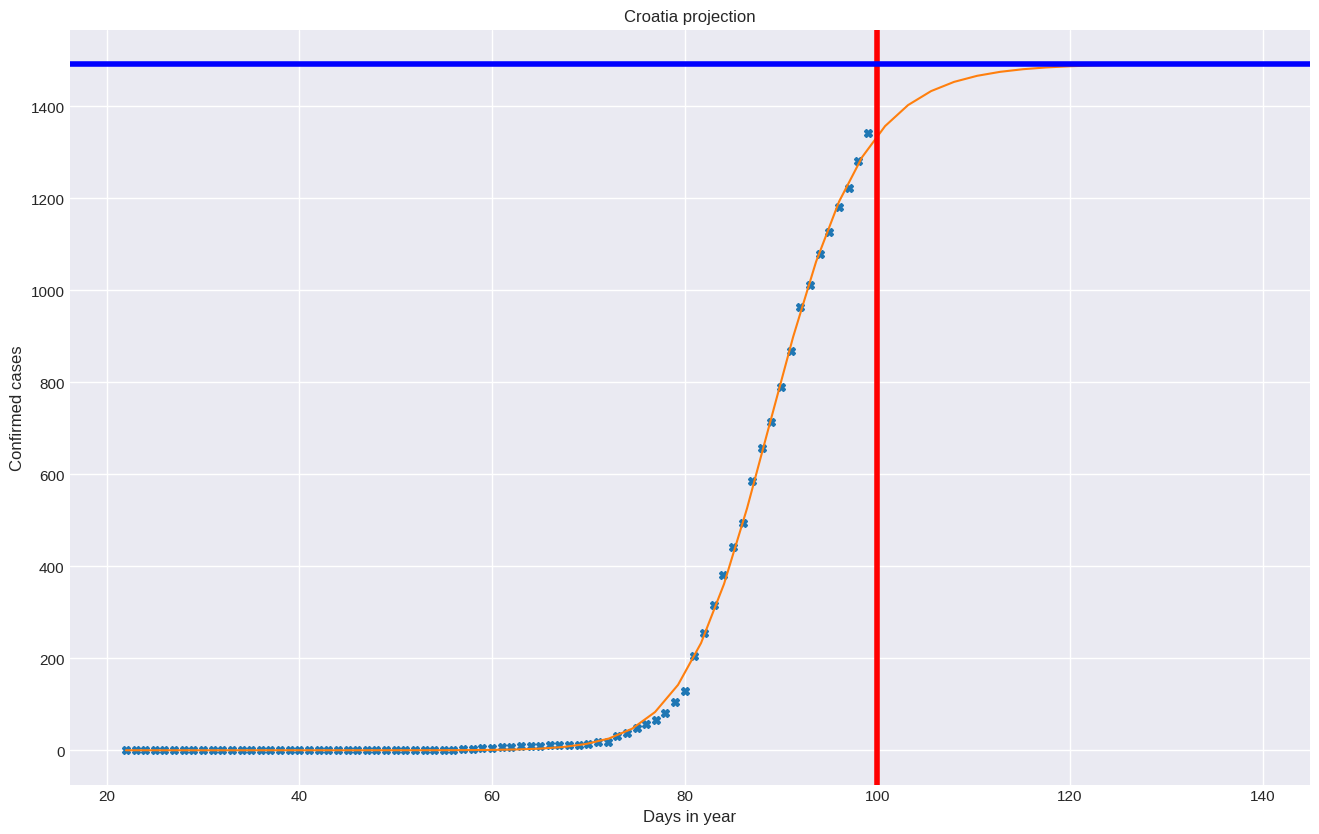

In [51]:
fit_data_df = croatia_df

x_data = fit_data_df['DayOfYear'].values
y_data = fit_data_df['Confirmed'].values

show_logistic_regression(x_data, y_data, title='Croatia projection')

## Normal distribution

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

In [53]:
def show_gaussian_regression(x_data, y_data, title='Data projection', initial_params=np.array([1.0, 1.0, 1.0])):

    def gaussian_equation(x, size, mu, sig):
        return size * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

    fitted_parameters, pcov = curve_fit(gaussian_equation, x_data, y_data, initial_params, maxfev=10000)

    model_predictions = gaussian_equation(x_data, *fitted_parameters) 

    absolute_error = model_predictions - y_data

    squared_error = np.square(absolute_error)
    mean_squared_error = np.mean(squared_error)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    r_squared = 1.0 - (np.var(absolute_error) / np.var(y_data))

    print('Parameters:', fitted_parameters)
    print('RMSE:', root_mean_squared_error)
    print('R-squared:', r_squared)

    print()


    def scatter_plot():
        f = plt.figure(figsize=(16,10), dpi=100)
        axes = f.add_subplot(111)

        # Plot the actual data
        axes.plot(x_data, y_data, 'X')

        # Create model data
        x_model = numpy.linspace(min(x_data), max(x_data) + 20)
        y_model = gaussian_equation(x_model, *fitted_parameters)

        # Plot model data
        axes.plot(x_model, y_model)

        axes.set_xlabel('Days in year')
        axes.set_ylabel('Confirmed cases')

        axes.set_title(title)

        #axes.axhline(fitted_parameters[0], 0, 1, color='blue', linewidth=4)


    scatter_plot()

Parameters: [1492.5641428    89.28312687  -18.99428647]
RMSE: 10.206152468331101
R-squared: 0.9992671808838909



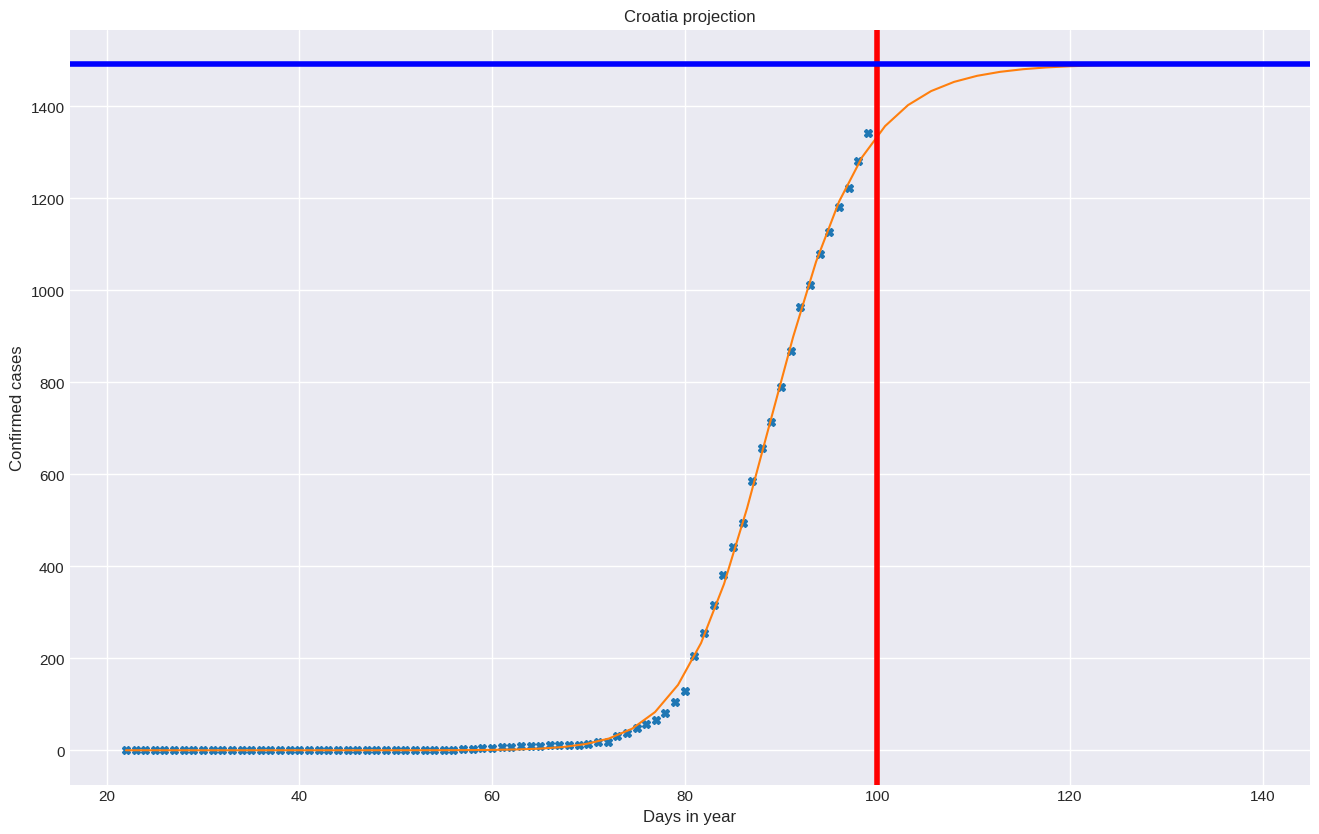

In [56]:
show_logistic_regression(x_data, y_data, title='Croatia projection')

Parameters: [75.8368834  89.97033037  8.07327979]
RMSE: 8.15827960469408
R-squared: 0.9141683458652109



/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



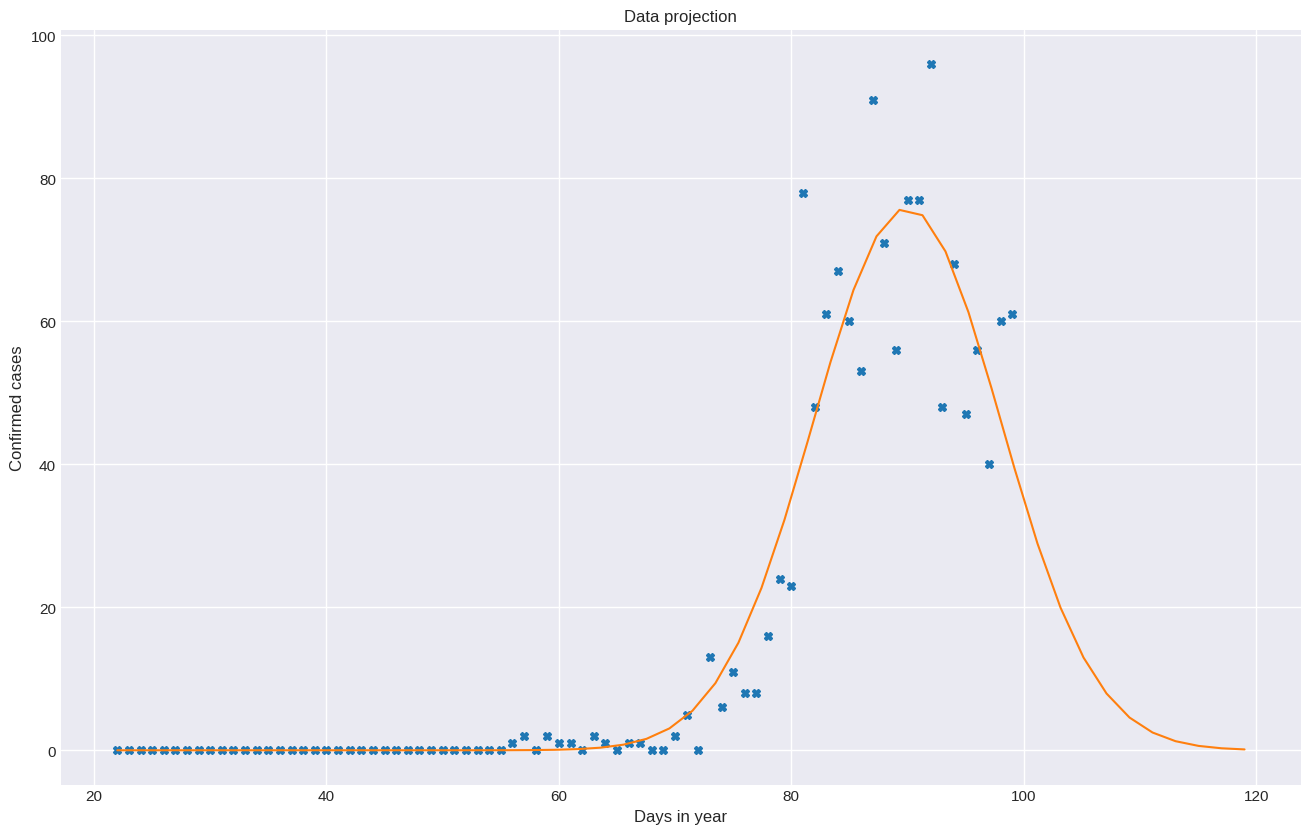

In [128]:
fit_data_df = croatia_df

x_data = fit_data_df['DayOfYear'].values

fit_data_df['Diff'] = fit_data_df['Confirmed'].diff().fillna(0)

y_data = fit_data_df['Diff'].values

show_gaussian_regression(x_data, y_data, initial_params=np.array([1000, 90.0, 10.0]))

## Simple model

* https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease
* https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology
* https://triplebyte.com/blog/modeling-infectious-diseases
* https://www.researchgate.net/publication/258849793_Bayesian_Analysis_of_Epidemics_-_Zombies_Influenza_and_other_Diseases
* https://mysite.science.uottawa.ca/rsmith43/ZombieCourse/Zombietalk.pdf
* https://medium.com/data-for-science/epidemic-modeling-101-or-why-your-covid19-exponential-fits-are-wrong-97aa50c55f8
* https://towardsdatascience.com/modelling-the-coronavirus-epidemic-spreading-in-a-city-with-python-babd14d82fa2
* https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
* https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html
* https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296

In [57]:
from IPython.display import Image
from IPython.core.display import HTML 

In [58]:
Image(url= "https://quicklatex.com/cache3/d9/ql_6e038218d26da67b7e1f3284b8bad3d9_l3.png")

In [59]:
Image(url= "https://quicklatex.com/cache3/c5/ql_6abd9952439ce9d24cbb6a746edfd6c5_l3.png")

In [60]:
Image(url= "https://quicklatex.com/cache3/d0/ql_68cd7fb84f939707ec58da791cb878d0_l3.png")

In [164]:
china_hubei_df = all_data_df[(all_data_df["Country/Region"] == 'China') & (all_data_df['Province/State'] == 'Hubei')]
china_henan_df = all_data_df[(all_data_df["Country/Region"] == 'China') & (all_data_df['Province/State'] == 'Henan')]
croatia_df = all_data_df[(all_data_df["Country/Region"] == 'Croatia')]

fit_data_df = china_hubei_df
#fit_data_df = germany_df
#fit_data_df = croatia_df

fit_data_df['Diff'] = fit_data_df['Confirmed'].diff().fillna(0)

# Select from the day the first confirmed case appeared!
#fit_data_df = fit_data_df[fit_data_df['DayOfYear'] >= fit_data_df[fit_data_df['Diff'] > 0]['DayOfYear'].min()]

x_data = fit_data_df['DayOfYear'].values
#y_data = fit_data_df['Confirmed'].values
y_data = fit_data_df['Diff'].values

#show_logistic_regression(x_data, y_data, title='China, Henan projection')
y_data

/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([    0.,     0.,   105.,   212.,   297.,   365.,  2131.,     0.,
        1349.,   903.,  1347.,  4024.,  2345.,  3156.,  2987.,  2447.,
        2841.,  2147.,  2531.,  2097.,  1638.,     0., 14840.,  6200.,
        1843.,  1933.,  1807.,  1693.,   349.,   411.,   220.,  1422.,
           0.,   203.,   499.,   401.,   409.,   318.,   423.,   570.,
         196.,   114.,   115.,   134.,   126.,    74.,    41.,    36.,
          17.,    13.,     8.,     5.,     4.,     4.,     4.,     1.,
           1.,     0.,     0.,     0.,     0.,     0.,     1.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     1.,     0.,
           0.,     1.,     0.,     0.,     0.,     0.])

In [165]:
fit_data_df['Diff'].sum()

67359.0

Text(0.5, 1.0, 'Henan confirmed cases')

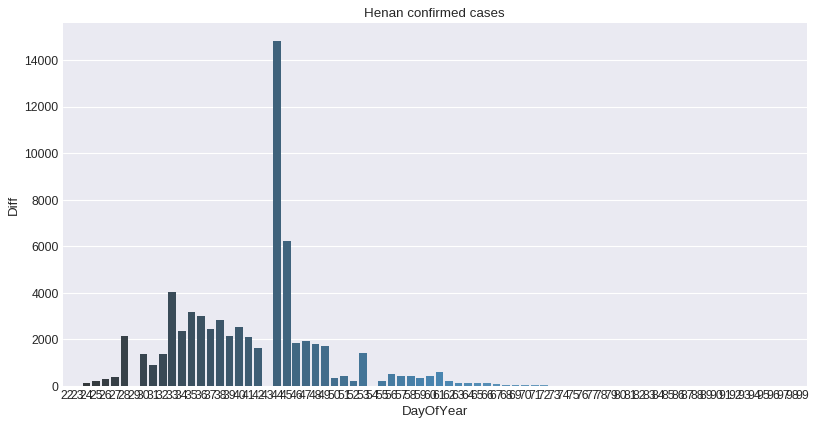

In [166]:
ax = sns.barplot(data=fit_data_df, x="DayOfYear", y="Diff", ci="sd", palette="Blues_d")
ax.set_title('Henan confirmed cases')

https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6

* https://stats.stackexchange.com/questions/446712/fitting-sir-model-with-2019-ncov-data-doesnt-conververge

In [167]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# x_data, y_data
print(x_data)
data = y_data #[1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4]

[22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45
 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93
 94 95 96 97 98 99]


In [168]:
n,beta,gamma = [1000,0.35,1/15]
#n_beta_gamma_p = [1000,2.5,1/15]

SIR_FIT_p = [200,1,0]

def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    
    N = S + I + R
    
    return ([-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I])

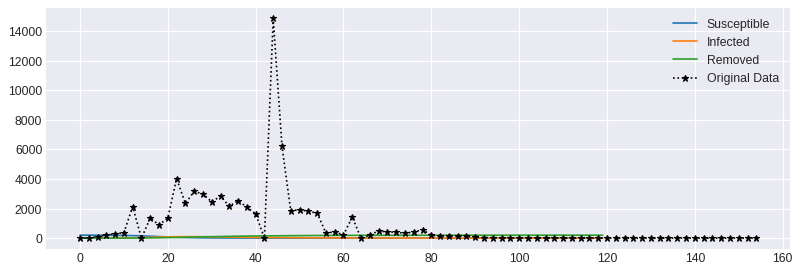

In [169]:
sol = solve_ivp(SIR,[0,120],SIR_FIT_p,t_eval=np.arange(0,120,1))

fig = plt.figure(figsize=(12,4))
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])
plt.plot(sol.t,sol.y[2])
plt.plot(np.arange(0, 155, 2), data,"k*:")
plt.grid("True")
plt.legend(["Susceptible","Infected","Removed","Original Data"])

## Interactive graph

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import integrate

from scipy.optimize import fmin, minimize

@interact
def show_with_beta(population_p=(10000, 4000000, 10000), beta_p=(0.001, 0.5, 0.001), gamma_p=(1, 30, 1)):

    #=====================================================
    #Notice we must import the Model Definition
    #=======================================================
    def eq(par, initial_cond, start_t, end_t, incr):

        t = np.linspace(start_t,end_t,incr)

        #differential-eq-system----------------------
        def funct(y,t):
            N,beta,gamma=par
            # the model equations (see Munz et al. 2009)
            S, I, R = y

            dSdt = -beta * S * I / N
            dIdt = beta * S * I / N - gamma * I
            dRdt = gamma * I

            return [dSdt, dIdt, dRdt]
        #integrate------------------------------------
        ds = integrate.odeint(funct, initial_cond, t)

        return (ds[:,0],ds[:,1],ds[:,2],t)
    #=======================================================
    #=====================================================

    #1.Get Data
    #====================================================
    Td, Zd = x_data, y_data
    #====================================================

    #2.Set up Info for Model System
    #===================================================
    # model parameters
    #----------------------------------------------------
    N = population_p #150  # Population number
    beta = beta_p    # transmission percent
    gamma = 1./gamma_p # 1 / days of recovery

    rates = (N,beta,gamma)

    # model initial conditions
    #---------------------------------------------------
    I0 = 5                  # initial confirmed population
    R0 = 0                  # initial death population
    S0 = N - I0 - R0        # initial population

    y0 = [S0, I0, R0]       # initial condition vector

    # model steps
    #---------------------------------------------------
    start_time = 20.0
    end_time   = 200.0
    intervals  = 200

    mt=np.linspace(start_time,end_time,intervals)

    # model index to compare to data
    #----------------------------------------------------
    #findindex=lambda x:np.where(mt>=x)[0][0]
    #mindex=list(map(findindex,Td))
    #print(Td.tolist())
    mindex = Td.tolist()
    #=======================================================



    #3.Score Fit of System
    #=========================================================
    def score(params):
    #def score(x, N, beta, gamma):
        N, beta, gamma = params
        #print(params)
        #print(x)
        #a.Get Solution to system
        dSdt, dIdt, dRdt, T = eq((N,beta,gamma),y0,start_time,end_time,intervals)
        #b.Pick of Model Points to Compare

        #model_predictions = list(map(lambda current_x: F1[current_x], x))
        model_predictions = dIdt[mindex]

        #model_predictions = gaussian_equation(x_data, *fitted_parameters) 

        absolute_error = model_predictions - y_data

        squared_error = np.square(absolute_error)
        mean_squared_error = np.mean(squared_error)
        root_mean_squared_error = np.sqrt(mean_squared_error)
        r_squared = 1.0 - (np.var(absolute_error) / np.var(y_data))


        #c.Score Difference between model and data points
        #ss=lambda data,model:((data-model)**2).sum()
        #return ss(Zd,model_predictions)


        #c.Score Difference between model and data points



        #ss=lambda data, model: ((data-model)**2).sum()
        #diff = ss(Zd,Zm)
        #print(root_mean_squared_error)
        return root_mean_squared_error
    #========================================================


    # 4.Optimize Fit
    #=======================================================
    fit_score=score((N,beta,gamma))
    #fit_score=score(x_data, N,beta,gamma)

    #results = fmin(score,(rates), maxiter=10000, disp=1, full_output=1)
    #bestrates = results[0]
    #bestscore = results[1]

    #bestrates, bestscore = curve_fit(score, x_data, y_data, rates)
    #bestrates, bestscore = minimize(score, x_data, args=(N,beta,gamma))

    #N,beta,gamma=bestrates
    newrates=(N, beta, gamma)
    print(beta/gamma)
    #P,d,B,G,A=answ[0]
    #newrates=(P,d,B,G,A)
    #=======================================================

    #5.Generate Solution to System
    #=======================================================
    dSdt, dIdt, dRdt, T=eq(newrates,y0,start_time,end_time,intervals)

    Zm=dIdt[mindex]
    Tm=T[mindex]
    #======================================================




    #6. Plot Solution to System
    #=========================================================
    plt.figure()
    plt.plot(T, dSdt, 'r-', alpha=0.5, lw=2, label='Susceptible')
    plt.plot(T, dIdt, 'b-', alpha=0.5, lw=2, label='Infected')
    plt.plot(T, dRdt, 'g-', alpha=0.5, lw=2, label='Recovered')
    #plt.plot(T,F1,'b-')
    #plt.plot(Tm,Zm,'ro')
    #plt.plot(Td,Zd,'g-')
    #plt.plot(x_data, y_data, 'g-')
    plt.grid("True")
    plt.legend(["Susceptible","Infected","Recovered"])#,"Original Data"])
    plt.xlabel('Days')
    plt.ylabel('Population')
    #plt.yscale('log')
    
    #plt.ax.ylimit(0, 1500)
    #legend.get_frame().set_alpha(0.5)
    #title='Fit Score: ' + str(bestscore)
    #plt.title(title)
    #=========================================================

interactive(children=(IntSlider(value=2000000, description='population_p', max=4000000, min=10000, step=10000)…

## China

In [189]:
china_hubei_df = all_data_df[(all_data_df["Country/Region"] == 'China') & (all_data_df['Province/State'] == 'Hubei')]
china_henan_df = all_data_df[(all_data_df["Country/Region"] == 'China') & (all_data_df['Province/State'] == 'Henan')]
croatia_df = all_data_df[(all_data_df["Country/Region"] == 'Croatia')]

fit_data_df = china_hubei_df
#fit_data_df = germany_df
#fit_data_df = croatia_df

fit_data_df['Diff'] = fit_data_df['Confirmed'].diff().fillna(0)

# Select from the day the first confirmed case appeared!
#fit_data_df = fit_data_df[fit_data_df['DayOfYear'] >= fit_data_df[fit_data_df['Diff'] > 0]['DayOfYear'].min()]

x_data = fit_data_df['DayOfYear'].values
#y_data = fit_data_df['Confirmed'].values
y_data = fit_data_df['Diff'].values

#show_logistic_regression(x_data, y_data, title='China, Henan projection')
y_data

/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([    0.,     0.,   105.,   212.,   297.,   365.,  2131.,     0.,
        1349.,   903.,  1347.,  4024.,  2345.,  3156.,  2987.,  2447.,
        2841.,  2147.,  2531.,  2097.,  1638.,     0., 14840.,  6200.,
        1843.,  1933.,  1807.,  1693.,   349.,   411.,   220.,  1422.,
           0.,   203.,   499.,   401.,   409.,   318.,   423.,   570.,
         196.,   114.,   115.,   134.,   126.,    74.,    41.,    36.,
          17.,    13.,     8.,     5.,     4.,     4.,     4.,     1.,
           1.,     0.,     0.,     0.,     0.,     0.,     1.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     1.,     0.,
           0.,     1.,     0.,     0.,     0.,     0.])

In [190]:
hubei_population = 11000000
germany_population = 84000000
#croatia_population = 4500000

#SIR_p = [300000,1,0]
SIR_p = [hubei_population,1,0]

def sumsq(p):
    beta, gamma = p
    def SIR(t,y):
        S = y[0]
        I = y[1]
        R = y[2]
        
        N = S + I + R
        
        return([-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I])
    
    sol = solve_ivp(SIR,[0,155],SIR_p,t_eval=np.arange(0, 155, 2))
    
    absolute_error = sol.y[1] - data

    #print(absolute_error)
    squared_error = np.square(absolute_error)
    mean_squared_error = np.mean(squared_error)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    
    r_squared = 1.0 - (np.var(absolute_error) / np.var(sol.y[1]))
    print(r_squared)
    
    # np.sqrt(np.mean((solution.y[1] - data)**2))
    
    #return mean_squared_error
    #result = sum(absolute_error**2)
    result = root_mean_squared_error # np.sum(squared_error)
    #print(result)
    return result
    #return (sum((sol.y[1]-data)**2))

In [191]:
from scipy.optimize import minimize

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html
msol = minimize(sumsq,[0.5,(1/15)], method='Nelder-Mead', options={'maxiter': 10000, 'disp': True}) # , method='CG')
msol.x

0.0011540879886227096
0.001137107727772535
0.0011979648308899637
0.0011723668695761136
0.0010281054212536445
0.0010426873215013677
0.0006489639642606182
-0.00013607326340392412
-0.0006660231381363513
-0.0009851049041589288
-0.0020797019904141845
-56559831.05504534
-176423461.84297407
-143344225.55669755
-204913715.48870572
-160809284.9079909
-2894706.4919368783
-0.0020797019904141845
-0.0014932711979456226
-92333963.2155652
-0.30591844161827986
-64020112.08927038
-4316.795971794141
-0.30591844161827786
-1.319996091684879
-929352230.0372553
-289.776130059881
-2374551.1438500187
-3688.87071868503
-11.418769496702595
-83924.70486349675
-204.70799549435768
-18039.787599060455
-898.1921067365962
-8462.307211770338
-9913.236454937216
-19537.22438131628
-6284.191119819806
-5367.718407866852
-3990.414716655698
-7009.447754903006
-8209.07854202438
-7380.856264044405
-5968.373298628787
-6293.664916265144
-5643.0130030310465
-6639.3389591816995
-6649.354735235047
-7014.735671934106
-6466.60855602

array([7.35303632, 7.1247037 ])

In [192]:
beta,gamma = msol.x

def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]

    N = S + I + R

    return ([-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I])

In [193]:
end_projection_day = 300
sol = solve_ivp(SIR,[0,end_projection_day],SIR_p,t_eval=np.arange(0, end_projection_day, 1))

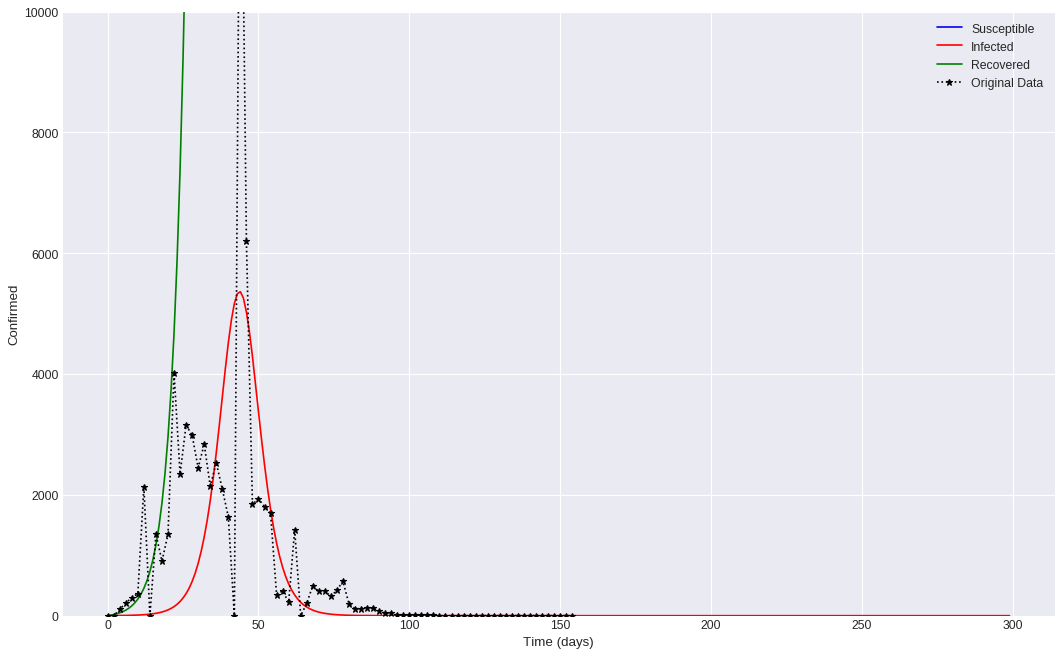

In [194]:
fig = plt.figure(figsize=(16,10))
plt.plot(sol.t,sol.y[0],"b-")
plt.plot(sol.t,sol.y[1],"r-")
plt.plot(sol.t,sol.y[2],"g-")
plt.ylim(0,10000)
#plt.yscale('log')
#plt.yticks(np.arange(4), ['0 M', '1 M', '2 M', '3 M'])
plt.plot(np.arange(0, 155, 2),data,"k*:")
#plt.title('Germany SIR model')
plt.xlabel('Time (days)')
plt.ylabel('Confirmed')
#plt.ylabel('Confirmed (Millions)')
plt.legend(["Susceptible", "Infected", "Recovered", "Original Data"])

In [195]:
print(np.max(sol.y[1]))

5363.386105273003


In [222]:
r=beta/gamma
print(beta,gamma,r)

1.2744010837196793 1.0435295817892076 1.2212409748218405


## Germany

In [212]:
china_hubei_df = all_data_df[(all_data_df["Country/Region"] == 'China') & (all_data_df['Province/State'] == 'Hubei')]
china_henan_df = all_data_df[(all_data_df["Country/Region"] == 'China') & (all_data_df['Province/State'] == 'Henan')]
croatia_df = all_data_df[(all_data_df["Country/Region"] == 'Croatia')]

#fit_data_df = china_hubei_df
fit_data_df = germany_df
#fit_data_df = croatia_df

fit_data_df['Diff'] = fit_data_df['Confirmed'].diff().fillna(0)

# Select from the day the first confirmed case appeared!
#fit_data_df = fit_data_df[fit_data_df['DayOfYear'] >= fit_data_df[fit_data_df['Diff'] > 0]['DayOfYear'].min()]

x_data = fit_data_df['DayOfYear'].values
#y_data = fit_data_df['Confirmed'].values
y_data = fit_data_df['Diff'].values

#show_logistic_regression(x_data, y_data, title='China, Henan projection')
y_data

/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([   0.,    0.,    0.,    0.,    0.,    1.,    3.,    0.,    0.,
          1.,    3.,    2.,    2.,    0.,    0.,    0.,    1.,    0.,
          1.,    0.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,   10.,
         19.,    2.,   31.,   51.,   29.,   37.,   66.,  220.,  188.,
        129.,  241.,  136.,  281.,  451.,  170., 1597.,  910., 1210.,
       1477., 1985., 3070., 2993., 4528., 2365., 2660., 4183., 3930.,
       4337., 6615., 6933., 6824., 4400., 4790., 4923., 6064., 6922.,
       6365., 4933., 4031., 3251., 4289., 5633.])

In [213]:
hubei_population = 11000000
germany_population = 84000000
#croatia_population = 4500000

SIR_p = [300000,1,0]
#SIR_p = [germany_population,1,0]

def sumsq(p):
    beta, gamma = p
    def SIR(t,y):
        S = y[0]
        I = y[1]
        R = y[2]
        
        N = S + I + R
        
        return([-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I])
    
    sol = solve_ivp(SIR,[0,155],SIR_p,t_eval=np.arange(0, 155, 2))
    
    absolute_error = sol.y[1] - data

    #print(absolute_error)
    squared_error = np.square(absolute_error)
    mean_squared_error = np.mean(squared_error)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    
    r_squared = 1.0 - (np.var(absolute_error) / np.var(sol.y[1]))
    print(r_squared)
    
    # np.sqrt(np.mean((solution.y[1] - data)**2))
    
    #return mean_squared_error
    #result = sum(absolute_error**2)
    result = root_mean_squared_error # np.sum(squared_error)
    #print(result)
    return result
    #return (sum((sol.y[1]-data)**2))

In [214]:
from scipy.optimize import minimize

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html
msol = minimize(sumsq,[0.5,(1/15)], method='Nelder-Mead', options={'maxiter': 10000, 'disp': True}) # , method='CG')
msol.x

0.04127935883252987
0.04073662346974416
0.04227969790149755
0.04316280732638211
0.04493682478224592
0.046368701426426795
0.04968614052205178
0.04320287840602344
-0.004386523438139944
-0.024536932391153732
-0.10199362248623967
-56558000.354329385
-176423355.5280991
-143344200.09457812
-204913578.94823617
-160809211.98623353
-2902076.1343034063
-0.10199362248623967
-0.06518286259177519
-92334110.14165515
-0.5305248570151391
-64020298.923272505
-4367.235246550212
-0.5305248570151873
-1.7903048272065871
-935222099.5468589
-299.3663955667979
-2380496.120066594
-3733.0349209743504
-12.771807793174785
-84314.6855835388
-211.99867894687597
-18169.786712494253
-916.2678653464114
-8539.99700706441
-10002.295771868383
-19676.69626959282
-6348.840320450977
-5424.2300021824385
-4037.6104073517295
-7077.939025574945
-8287.5187335369
-6029.686517682147
-7453.0918429015865
-6357.536488768048
-5703.317742881505
-6705.678763688773
-6696.486433230897
-6872.734984750953
-7073.072930127913
-6522.5586591513

array([1.27440108, 1.04352958])

In [215]:
beta,gamma = msol.x

def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]

    N = S + I + R

    return ([-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I])

In [216]:
end_projection_day = 300
sol = solve_ivp(SIR,[0,end_projection_day],SIR_p,t_eval=np.arange(0, end_projection_day, 1))

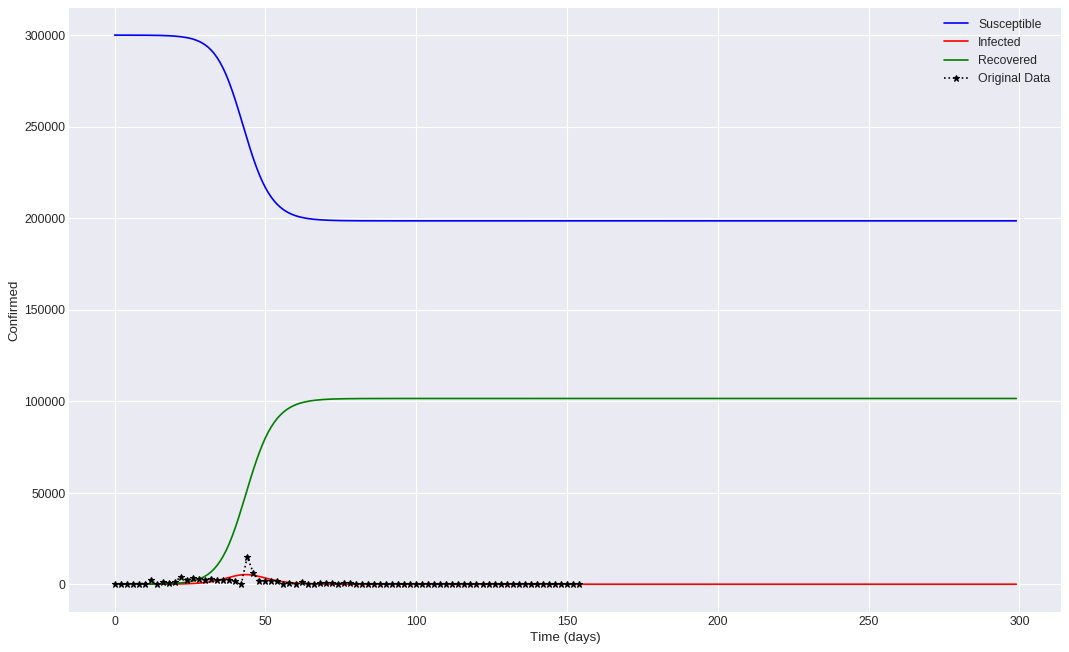

In [220]:
fig = plt.figure(figsize=(16,10))
plt.plot(sol.t,sol.y[0],"b-")
plt.plot(sol.t,sol.y[1],"r-")
plt.plot(sol.t,sol.y[2],"g-")
#plt.ylim(0,10000)
#plt.yscale('log')
#plt.yticks(np.arange(4), ['0 M', '1 M', '2 M', '3 M'])
plt.plot(np.arange(0, 155, 2),data,"k*:")
#plt.title('Germany SIR model')
plt.xlabel('Time (days)')
plt.ylabel('Confirmed')
#plt.ylabel('Confirmed (Millions)')
plt.legend(["Susceptible", "Infected", "Recovered", "Original Data"])

In [218]:
print(np.max(sol.y[1]))

5234.7322757937345


In [221]:
r=beta/gamma
print(beta,gamma,r)

1.2744010837196793 1.0435295817892076 1.2212409748218405
